In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

print("loading data")
train = pd.read_csv('~/python/kaggle/housing_prices/train.csv')
test = pd.read_csv('~/python/kaggle/housing_prices/test.csv')

imputer_mode = SimpleImputer(strategy='most_frequent')


#print(train.describe())

loading data


In [7]:
null_cols = train.columns[train.isnull().any()]
quantity_null_col = train.isnull().any().sum()
quantity_per_col  = train[null_cols].isnull().sum()

print(quantity_per_col)
print('')
print("number of features with null columns")
print(quantity_null_col)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

number of features with null columns
19


In [8]:
#---------------
#LotFrontage Imputation
imputer = SimpleImputer()
#imputer = SimpleImputer(Strategy = 'median')
imputed_data = imputer.fit_transform(train['LotFrontage'].values.reshape(1460, 1))
train['LotFrontage'] = imputed_data
print(train['LotFrontage'].describe())


count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [9]:
#Alley
# train['Alley'] = train['Alley'].replace({'NA':1, 'Pave':2, 'Grvl':3})
train['Alley'].describe()
train['Alley'] = train['Alley'].fillna(1)
train['Alley'] = train['Alley'].replace({'Grvl':2, 'Pave':3})
# print(train['Alley'])


In [10]:
#MasVnrType
# lb = LabelBinarizer()
imputed_data = imputer_mode.fit_transform(train['MasVnrType'].values.reshape(1460,1))
train['MasVnrType'] = imputed_data


In [11]:
#-------Street-----------
train['Street'] = train['Street'].replace({'Grvl':1, 'Pave':0})

#---------LotShape---------
train['LotShape'] = train['LotShape'].replace({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})

#------LandContour
train['LandContour'] = train['LandContour'].replace({'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1})

#----------Utilities---------
train['Utilities'] = train['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})

#---------LandSlope
train['LandSlope'] = train['LandSlope'].replace({'Gtl':3, 'Mod':2, 'Sev':1})

#------MasVnrArea---
train['MasVnrArea'] = imputer.fit_transform(train['MasVnrArea'].values.reshape(1460,1))

#------------Exterqual-----------
train['ExterQual'] = train['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

#------ExternCond-------
train['ExterCond'] = train['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

#-----BsmtQual------
train['BsmtQual'] = train['BsmtQual'].fillna(1)
train['BsmtQual'] = train['BsmtQual'].replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2})

#-----BsmtCond
train['BsmtCond'] = train['BsmtCond'].fillna(1)
train['BsmtCond'] = train['BsmtCond'].replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2})

#--------BsmtExposure
train['BsmtExposure'] = train['BsmtExposure'].fillna(1)
train['BsmtExposure'] = train['BsmtExposure'].replace({ 'Gd':5, 'Av':4, 'Mn':3, 'No':2})

#BsmtFinType1
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(1)
train['BsmtFinType1'] = train['BsmtFinType1'].replace({'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

#BsmtFinType2
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(1)
train['BsmtFinType2'] = train['BsmtFinType2'].replace({'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

#Heating
train['HeatingQC'] = train['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#CentralAir
train['CentralAir'] = train['CentralAir'].replace({'Y':1, 'N':0})

#Electrical
train['Electrical'] = train['Electrical'].fillna(2)
train['Electrical'] = train['Electrical'].replace({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

#kitchenQual
train['KitchenQual'] = train['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#FireplceQu
train['FireplaceQu'] = train['FireplaceQu'].fillna(1)
train['FireplaceQu'] = train['FireplaceQu'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#GarageType
imputed_data_GYB = imputer_mode.fit_transform(train['GarageType'].values.reshape(1460,1))
train['GarageType'] = imputed_data_GYB

#GarageYrBlt
imputed_data_GYB = imputer_mode.fit_transform(train['GarageYrBlt'].values.reshape(1460,1))
train['GarageYrBlt'] = imputed_data_GYB

#GarageFinish
train['GarageFinish'] = train['GarageFinish'].fillna(1)
train['GarageFinish'] = train['GarageFinish'].replace({'Unf':2, 'RFn':3, 'Fin':4})

#GarageQual
train['GarageQual'] = train['GarageQual'].fillna(1)
train['GarageQual'] = train['GarageQual'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#GarageCond
train['GarageCond'] = train['GarageCond'].fillna(1)
train['GarageCond'] = train['GarageCond'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#PavedDrive
train['PavedDrive'] = train['PavedDrive'].replace({'N':1, 'P':2, 'Y':3})

#PoolQC
train['PoolQC'] = train['PoolQC'].fillna(1)
train['PoolQC'] = train['PoolQC'].replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#Fence
train['Fence'] = train['Fence'].fillna('None')


In [12]:
lis_one_hot = ['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofMatl','RoofStyle', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating', 'Functional', 'GarageType', 'Fence',
                'MiscFeature', 'SaleType', 'SaleCondition']

one_hot = pd.get_dummies(train, columns=lis_one_hot)


In [13]:
path = '~/python/kaggle/one_hot.csv'
one_hot.to_csv(path)
print(one_hot.shape)

(1460, 224)


In [14]:
Y = one_hot['SalePrice']
one_hot.drop(['Id', 'SalePrice'], axis=1)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,0,1,4,4,4,3,7,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,0,1,4,4,4,3,6,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,0,1,3,4,4,3,7,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,0,1,3,4,4,3,7,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,0,1,3,4,4,3,8,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,0,1,3,4,4,3,5,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,0,1,4,4,4,3,8,...,0,0,0,1,0,0,0,0,1,0
7,60,70.049958,10382,0,1,3,4,4,3,7,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,0,1,4,4,4,3,7,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,0,1,4,4,4,3,5,...,0,0,0,1,0,0,0,0,1,0


In [15]:
num_trees = 100
max_fet = 3
rr = RandomForestRegressor(n_estimators=num_trees, max_features=max_fet)

In [16]:
print("Fitting")
rr.fit(one_hot, Y)

Fitting


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import accuracy_score
print("Predicting on training data")
predictions = rr.predict(one_hot)

Predicting on training data


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = pd.DataFrame(predictions)
Y = pd.DataFrame(Y)
print(predictions.shape)
print(Y.shape)
# predictions = predictions.values.reshape(1460,)
print("rmse : ",sqrt(mean_squared_error(Y, predictions)))
Y = Y.values.reshape(1460,)


(1460, 1)
(1460, 1)
rmse :  12259.368418735514


In [19]:
train_x, val_x, train_y, val_y = train_test_split(one_hot, Y, random_state = 42)
print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(1095, 224) (365, 224) (1095,) (365,)


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

number_trees = []
mse_train = []
mse_val = []
for i in range(100,1100,100):
    print("starting training for: ", i)
    number_trees.append(i)
    rr = RandomForestRegressor(n_estimators=i, max_depth=25,max_features=10)
    rr.fit(train_x, train_y)
    print("---predicting---")
    predict_train = rr.predict(train_x)
    predict_val = rr.predict(val_x)
    print("---mse---")
    mse_train.append(mean_squared_error(train_y, predict_train))
    mse_val.append(mean_squared_error(val_y, predict_val))
    
# for i in range(2,100,5):
#     print("starting training for: ", i)
#     number_trees.append(i)
#     rr = RandomForestRegressor(n_estimators=200, max_depth=25,max_features=i)
#     rr.fit(train_x, train_y)
#     print("---predicting---")
#     predict_train = rr.predict(train_x)
#     predict_val = rr.predict(val_x)
#     print("---mse---")
#     mse_train.append(mean_squared_error(train_y, predict_train))
#     mse_val.append(mean_squared_error(val_y, predict_val))
    
for i in range(2,100,10):
    print("starting training for: ", i)
    number_trees.append(i)
    rr = RandomForestRegressor(n_estimators=200, max_depth=i,max_features=60)
    rr.fit(train_x, train_y)
    print("---predicting---")
    predict_train = rr.predict(train_x)
    predict_val = rr.predict(val_x)
    print("---mse---")
    mse_train.append(mean_squared_error(train_y, predict_train))
    mse_val.append(mean_squared_error(val_y, predict_val))

starting training for:  2
---predicting---
---mse---
starting training for:  12
---predicting---
---mse---
starting training for:  22
---predicting---
---mse---
starting training for:  32
---predicting---
---mse---
starting training for:  42
---predicting---
---mse---
starting training for:  52
---predicting---
---mse---
starting training for:  62
---predicting---
---mse---
starting training for:  72
---predicting---
---mse---
starting training for:  82
---predicting---
---mse---
starting training for:  92
---predicting---
---mse---


In [52]:
# print(number_trees)
print(mse_train)
print(mse_val)
# number_trees = pd.DataFrame(number_trees)

[1129172587.5708895, 30722792.288992055, 32522645.737968933, 32429048.090640523, 37062033.086920746, 31607964.60801804, 30141159.911319293, 29169515.456660565, 34052196.63994726, 29072442.92897385]
[1455614588.2357616, 234128469.14043877, 214872220.1235846, 238263364.45847884, 243785939.0661818, 219594428.41236877, 236441455.09037814, 234602189.10860118, 229405325.38818547, 225939860.1335175]


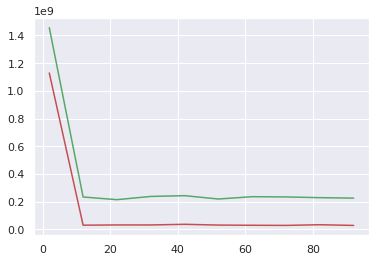

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()
fmri = sns.load_dataset("fmri")

number_trees = np.array(number_trees)
mse_tain = np.array(mse_train)
d = { 'mse_val':mse_val,'mse_train':mse_train}
data = pd.DataFrame(d)

fig = plt.figure()
ax = plt.axes()
plt.plot(number_trees, mse_train,color='r')
plt.plot(number_trees, mse_val, color='g')


plt.show()

In [48]:
sns.kdeplot(data['mse_train'], ax=ax)
plt.show()